In [1]:
# thư viện cơ bản
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import datetime
# thư viện phân tích thống kê
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# thư viện mô hình
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima

In [2]:
df = pd.read_excel(r'D:\Nghiên cứu Khoa học\Dự đoán Eg\Data.xlsx')
print(df)
print(df.info()) #Kiểm tra loại dữ liệu và rà soát xem dữ liệu có thiếu, mất dữ liệu nào không
print(pd.DataFrame(df.describe())) #Kiểm tra số liệu cơ bản

          Time         Eg
0   2012-01-01  117747526
1   2012-02-01  115286321
2   2012-03-01  123852570
3   2012-04-01  133688486
4   2012-05-01  130366724
..         ...        ...
103 2020-08-01  142772245
104 2020-09-01  148243878
105 2020-10-01  136795601
106 2020-11-01  142761389
107 2020-12-01  140797458

[108 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    108 non-null    datetime64[ns]
 1   Eg      108 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 KB
None
                 Eg
count  1.080000e+02
mean   1.452807e+08
std    1.523483e+07
min    1.069495e+08
25%    1.349754e+08
50%    1.460569e+08
75%    1.569179e+08
max    1.805293e+08


In [3]:
new_df = df.set_index(['Time']) #set hàng cho cột ngày\
new_df = new_df['2012':'2019']

In [4]:
new_df

,Eg
Time,
2012-01-01,117747526
2012-02-01,115286321
2012-03-01,123852570
2012-04-01,133688486
2012-05-01,130366724
...,...
2019-08-01,164355253
2019-09-01,161734766
2019-10-01,159731850


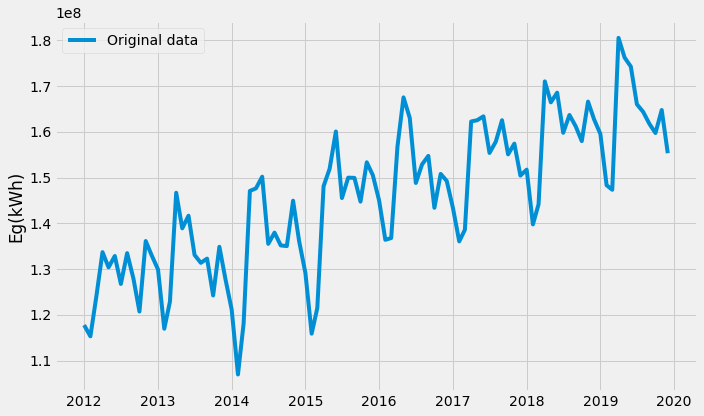

In [5]:
# trực quan dữ liệu bằng đồ thị
plt.figure(figsize=(10,6))
plt.plot(new_df,label='Original data')
plt.legend(loc='best')
plt.ylabel('Eg(kWh)')
plt.tight_layout()
plt.savefig('Original plot')

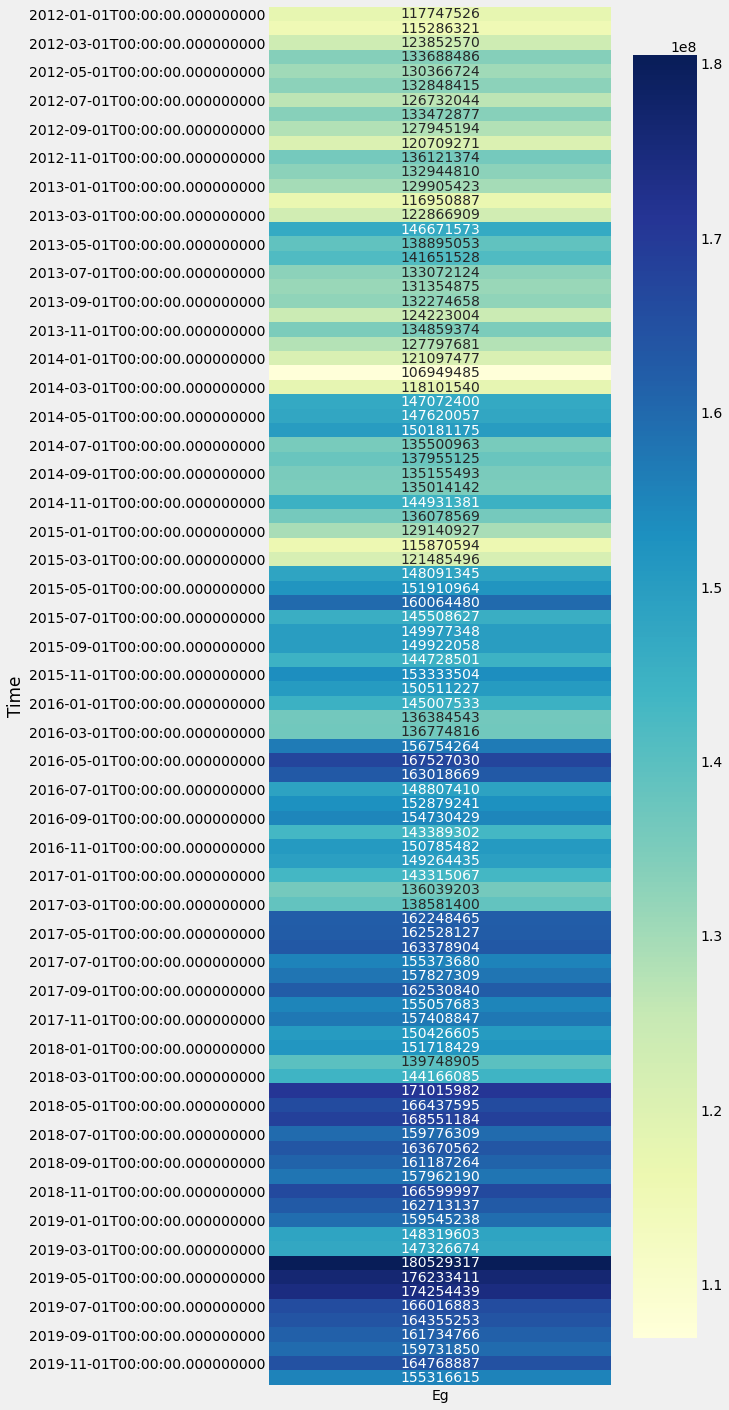

In [6]:
plt.figure(figsize=(10,20))
sns.heatmap(new_df,annot=True,fmt='d',cmap='YlGnBu')
plt.tight_layout()
plt.savefig('figure')

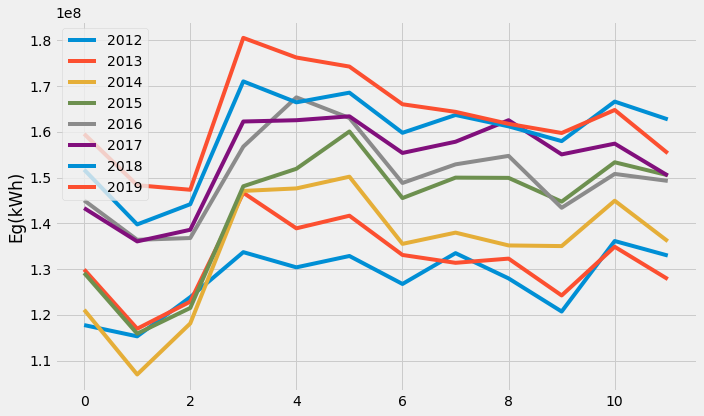

In [7]:
plt.figure(figsize=(10,6))
plt.plot(new_df['2012'].values,label='2012')
plt.plot(new_df['2013'].values,label='2013')
plt.plot(new_df['2014'].values,label='2014')
plt.plot(new_df['2015'].values,label='2015')
plt.plot(new_df['2016'].values,label='2016')
plt.plot(new_df['2017'].values,label='2017')
plt.plot(new_df['2018'].values,label='2018')
plt.plot(new_df['2019'].values,label='2019')
plt.ylabel('Eg(kWh)')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('seasonal')

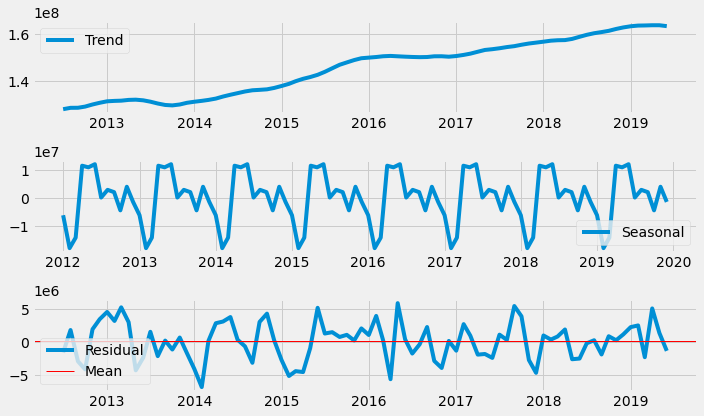

In [8]:
# sử dụng công cụ chuỗi thời gian phân rã để phân tích thành phần trong chuỗi
new_df_decomp = seasonal_decompose(new_df)
plt.figure(figsize=(10,6))
plt.subplot(311)
plt.plot(new_df_decomp.trend,label='Trend') #trung bình trượt
plt.legend(loc='best')

plt.subplot(312)
plt.plot(new_df_decomp.seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(313)
plt.plot(new_df_decomp.resid,label='Residual')
plt.axhline(y=new_df_decomp.resid['2012':'2019'].mean(),color='red',label='Mean',linewidth=1)
plt.legend(loc='best')

plt.tight_layout()
plt.savefig('Original decomp')

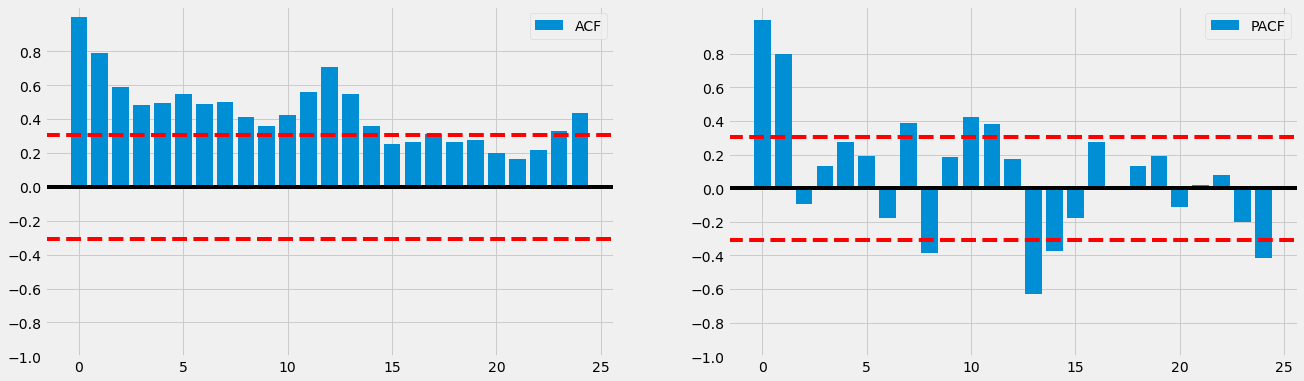

In [9]:
plt.figure(figsize=(20,6))

plt.subplot(121)
plt.bar(np.arange(0,25,1),acf(new_df)[0:25],label='ACF')
plt.axhline(y=0,color='black')
plt.axhline(y=1.96/np.sqrt(len(acf(new_df))),color='red',linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(acf(new_df))),color='red',linestyle='--')
plt.legend(loc='best')
plt.yticks(np.arange(-1,1,0.2))

plt.subplot(122)
plt.bar(np.arange(0,25,1),pacf(new_df)[0:25],label='PACF')
plt.axhline(y=0,color='black')
plt.axhline(y=1.96/np.sqrt(len(pacf(new_df))),color='red',linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(pacf(new_df))),color='red',linestyle='--')
plt.legend(loc='best')
plt.yticks(np.arange(-1,1,0.2))


plt.show()

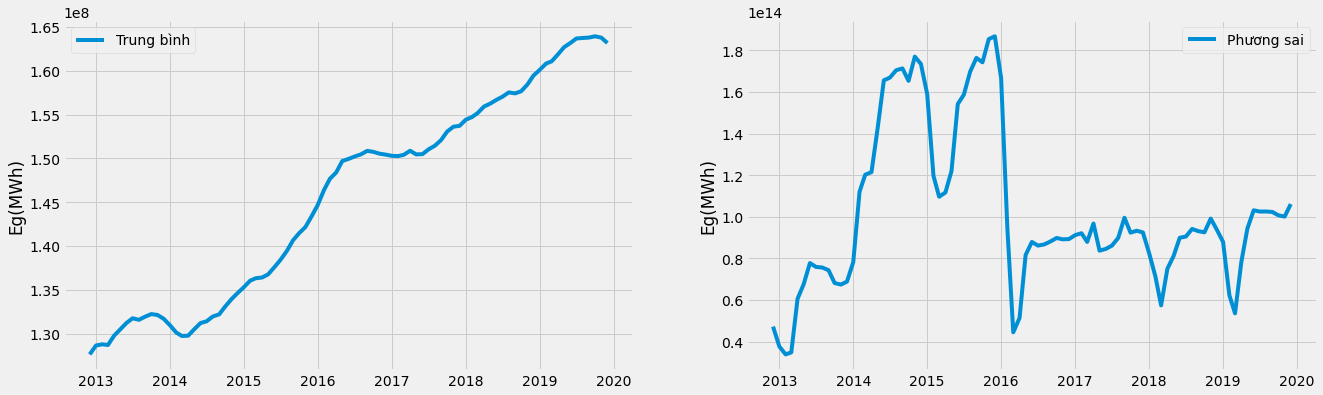

In [10]:
plt.figure(figsize=(20,6))
plt.subplot(121)
plt.plot(new_df.rolling(window=12).mean(),label='Trung bình')
plt.ylabel('Eg(MWh)')
plt.xlabel='Thời gian'
plt.legend(loc='best')
plt.subplot(122)
plt.plot(new_df.rolling(window=12).var(),label='Phương sai')
plt.ylabel('Eg(MWh)')
plt.xlabel='Thời gian'
plt.legend(loc='best')
plt.show()

# Kiểm tra chuỗi thời gian có dừng hay không



## 1. Trực quan đồ thị


In [11]:
# hàm trực quan đồ thị

In [12]:
def visualize_ts(data):
    plt.figure(figsize=(10,6))
    plt.plot(data,label='Chuỗi')
    plt.plot(data.rolling(window=12).mean(),label='Trung bình')
    plt.plot(data.rolling(window=12).std(),label='Độ lệch chuẩn')
    plt.legend(loc='best')
    
    plt.show()
    

## 2. ADF test kiểm tra nghiệm đơn vị

In [13]:
# Tạo hàm kiểm tra ADF

In [14]:
def adf_ts(df):
    result = adfuller(df)
    print('ADF statistic: %f' %result[0])
    print('p-value: %f' %result[1])
    print('Critical of value: ')
    for key, value in result[4].items():
        print('\t%s : %f' %(key, value))
    

In [15]:
 def kpss_ts(df):
        result_kpss = kpss(df)
        print('KPSS statistic: %f' %result_kpss[0])
        print('p-value: %f' %result_kpss[1])
        print('Critical of value: ')
        for key, value in result_kpss[3].items():
            print('\t%s : %f' %(key,value))

In [16]:
adf_ts(new_df)

ADF statistic: -0.529296
p-value: 0.886172
Critical of value: 
	1% : -3.511712
	5% : -2.897048
	10% : -2.585713


In [17]:
kpss_ts(new_df)

KPSS statistic: 0.828912
p-value: 0.010000
Critical of value: 
	10% : 0.347000
	5% : 0.463000
	2.5% : 0.574000
	1% : 0.739000


C:\Users\VINH\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


#### => Như vậy chuỗi thời gian ban đầu không dừng

In [18]:
def acf_pacf(data):
    plt.figure(figsize=(20,6))

    plt.subplot(121)
    plt.bar(np.arange(0,20,1),acf(data)[0:20],label='ACF')
    plt.axhline(y=0,color='black')
    plt.axhline(y=1.96/np.sqrt(len(acf(data))),color='red',linestyle='--')
    plt.axhline(y=-1.96/np.sqrt(len(acf(data))),color='red',linestyle='--')
    plt.legend(loc='best')
    plt.yticks(np.arange(-1,1,0.2))

    plt.subplot(122)
    plt.bar(np.arange(0,20,1),pacf(data)[0:20],label='PACF')
    plt.axhline(y=0,color='black')
    plt.axhline(y=1.96/np.sqrt(len(pacf(data))),color='red',linestyle='--')
    plt.axhline(y=-1.96/np.sqrt(len(pacf(data))),color='red',linestyle='--')
    plt.legend(loc='best')
    plt.yticks(np.arange(-1,1,0.2))

    plt.show()
    

#  Chuyển đỗi chuỗi dừng

## 1. Lấy sai phân các bậc của chuỗi

### Ổn định phương sai bằng biến đổi log

In [19]:
log_df = np.log(new_df)
print(pd.DataFrame(log_df.describe()))

              Eg
count  96.000000
mean   18.789732
std     0.111929
min    18.487867
25%    18.710619
50%    18.807299
75%    18.880359
max    19.011404


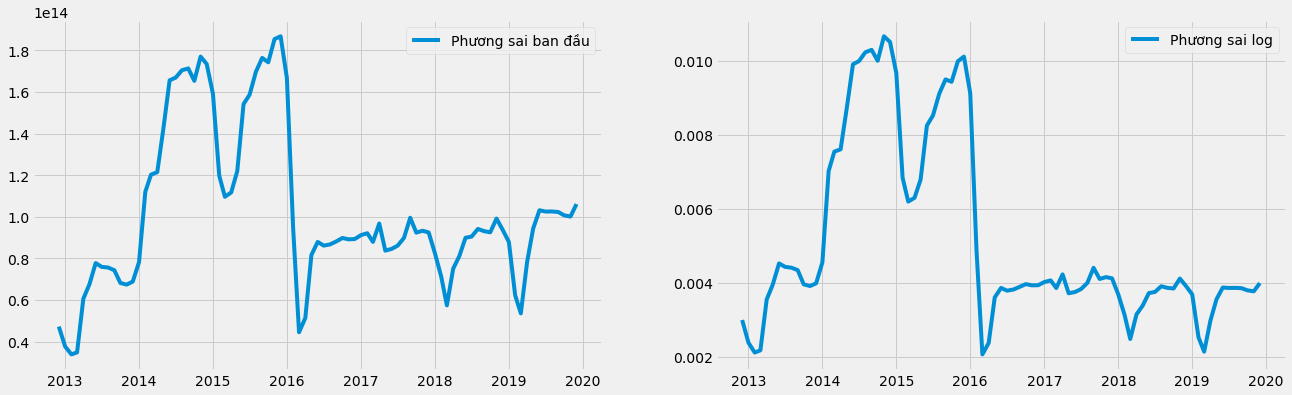

In [20]:
plt.figure(figsize=(20,6))
plt.subplot(121)
plt.plot(new_df.rolling(window=12).var(),label='Phương sai ban đầu')
plt.legend(loc='best')
plt.subplot(122)
plt.plot(log_df.rolling(window=12).var(),label='Phương sai log')
plt.legend(loc='best')
plt.show()

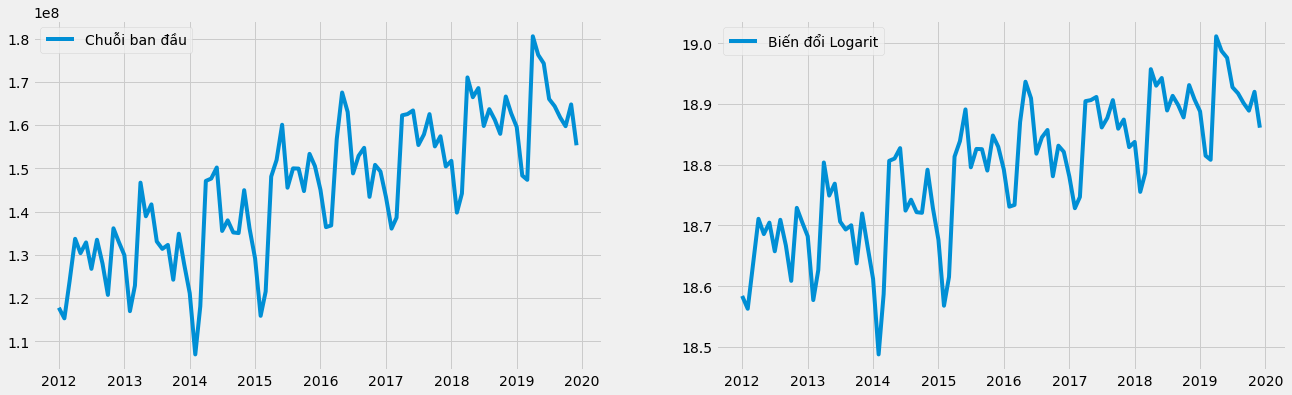

In [21]:
plt.figure(figsize=(20,6))
plt.subplot(121)
plt.plot(new_df,label='Chuỗi ban đầu')
plt.legend(loc='best')
plt.subplot(122)
plt.plot(log_df,label='Biến đổi Logarit')
plt.legend(loc='best')
plt.show()

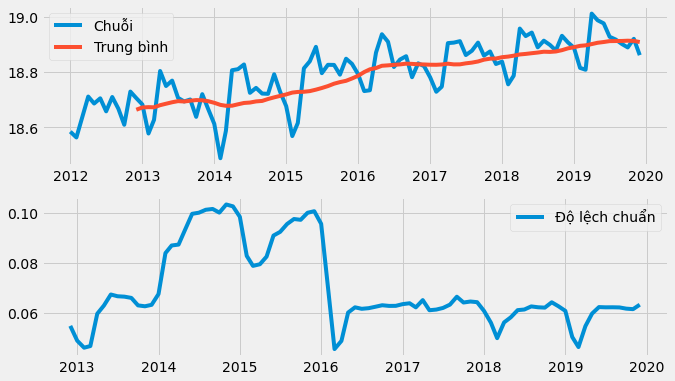

In [22]:
plt.figure(figsize=(10,6))
plt.subplot(211)
plt.plot(log_df,label='Chuỗi')
plt.plot(log_df.rolling(window=12).mean(),label='Trung bình')
plt.legend(loc='best')

plt.subplot(212)
plt.plot(log_df.rolling(window=12).std(),label='Độ lệch chuẩn')
plt.legend(loc='best')

plt.show()

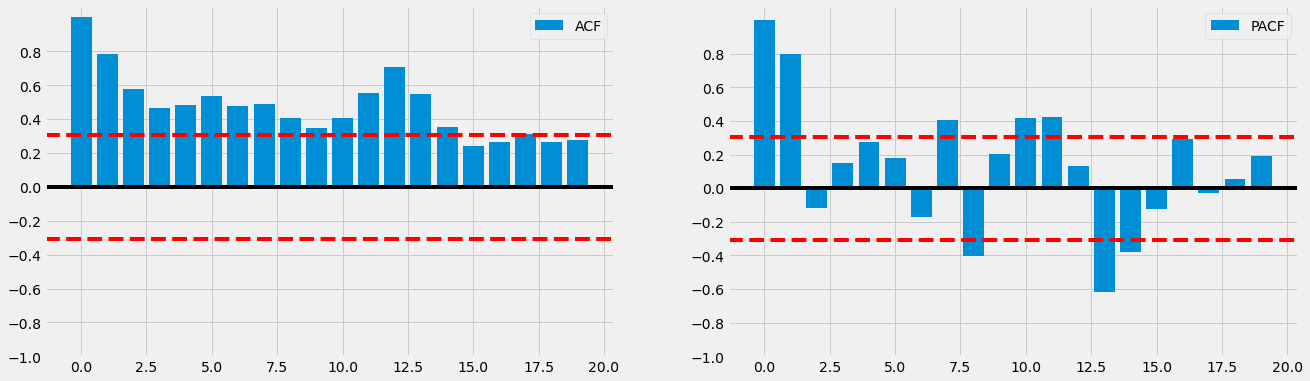

In [23]:
acf_pacf(log_df)

In [24]:
adf_ts(log_df)

ADF statistic: -0.623213
p-value: 0.865650
Critical of value: 
	1% : -3.511712
	5% : -2.897048
	10% : -2.585713


<AxesSubplot:xlabel='Time'>

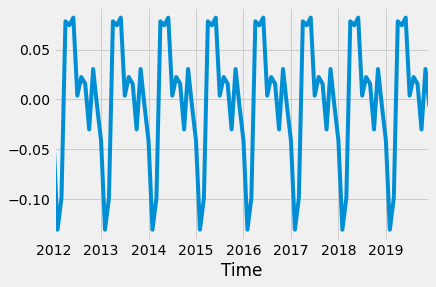

In [25]:
seasonal_decompose(log_df).seasonal.plot()

### diff_log

In [26]:
log_diff = log_df - log_df.shift(1)
log_diff.dropna(inplace=True)

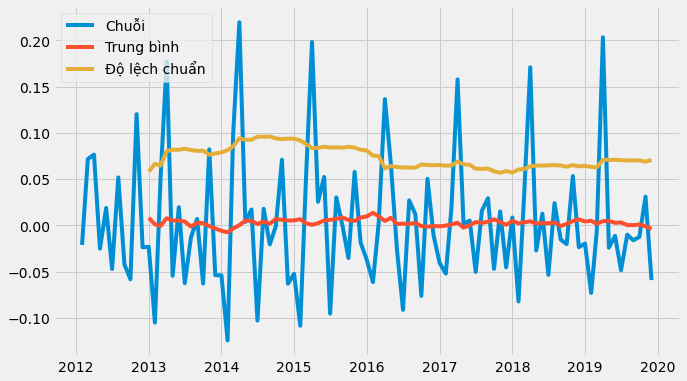

In [27]:
visualize_ts(log_diff)

In [28]:
adf_ts(log_diff)

ADF statistic: -3.830867
p-value: 0.002607
Critical of value: 
	1% : -3.511712
	5% : -2.897048
	10% : -2.585713


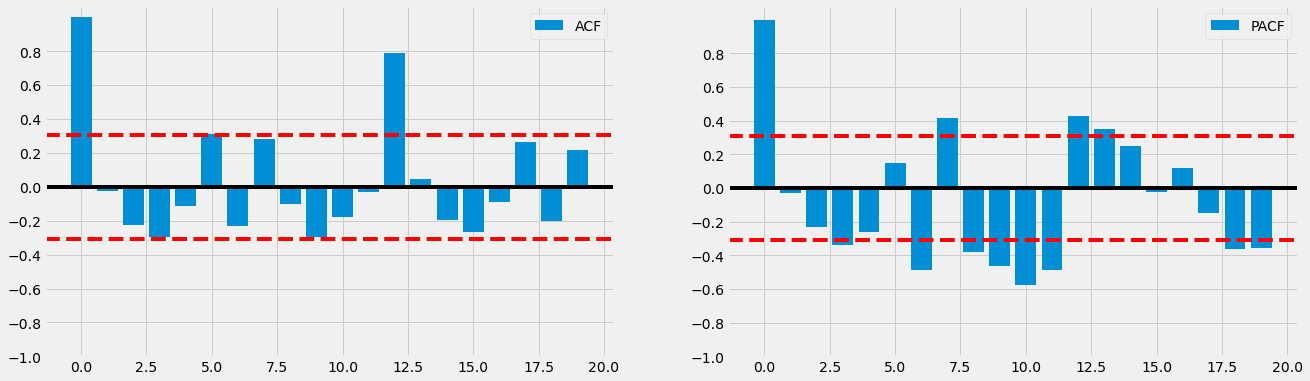

In [29]:
acf_pacf(log_diff)

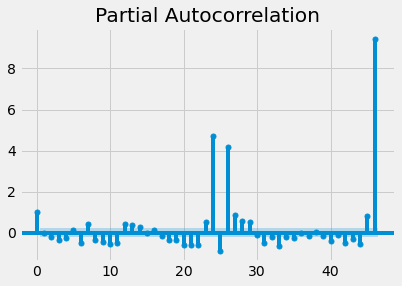

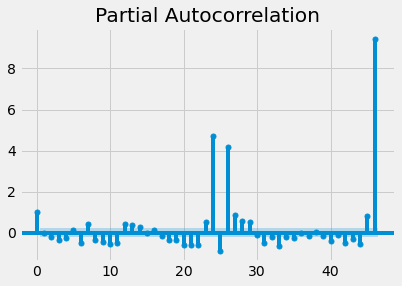

In [30]:
plot_pacf(log_diff,lags=46)

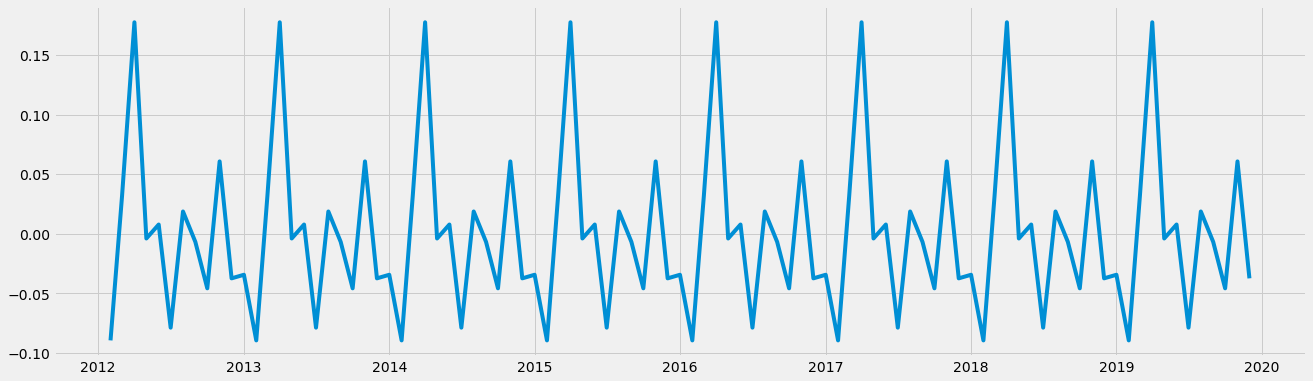

In [31]:
plt.figure(figsize=(20,6))
plt.plot(seasonal_decompose(log_diff).seasonal)

# Chia tập dữ liệu


In [32]:
train_log = log_df['2012':'2018']
test_log = log_df['2019']

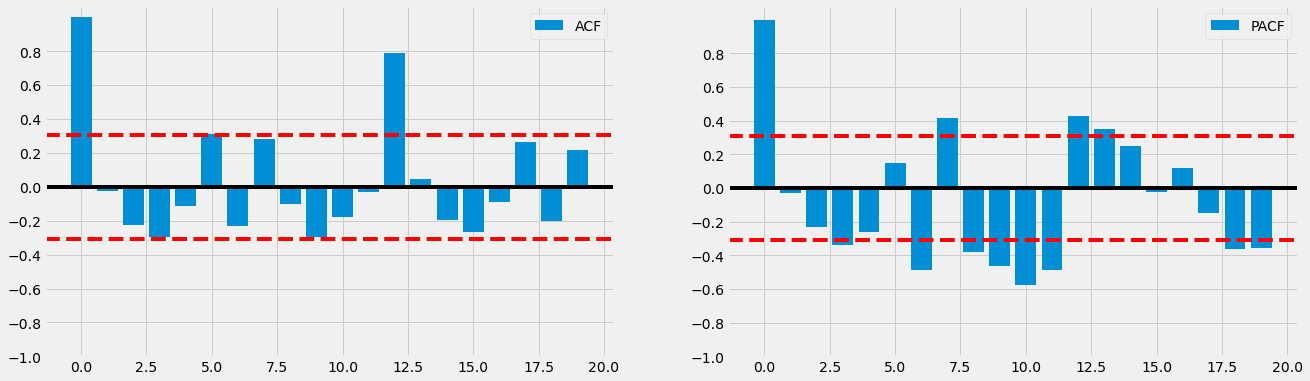

In [33]:
acf_pacf(log_df.diff(1).dropna())

In [34]:
import warnings
warnings.filterwarnings('ignore')
model_arima = ARIMA(train_log,order=(3,1,3))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D.Eg   No. Observations:                   83
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 125.208
Method:                       css-mle   S.D. of innovations              0.051
Date:                Tue, 01 Jun 2021   AIC                           -234.415
Time:                        21:13:16   BIC                           -215.064
Sample:                    02-01-2012   HQIC                          -226.641
                         - 12-01-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0033      0.000      7.653      0.000       0.002       0.004
ar.L1.D.Eg    -0.2609      0.119     -2.200      0.028      -0.493      -0.029
ar.L2.D.Eg    -0.3370      0.114     -2.944      0.0

count    83.000000
mean      0.001215
std       0.053902
min      -0.148621
25%      -0.029459
50%      -0.003103
75%       0.027305
max       0.125344
dtype: float64


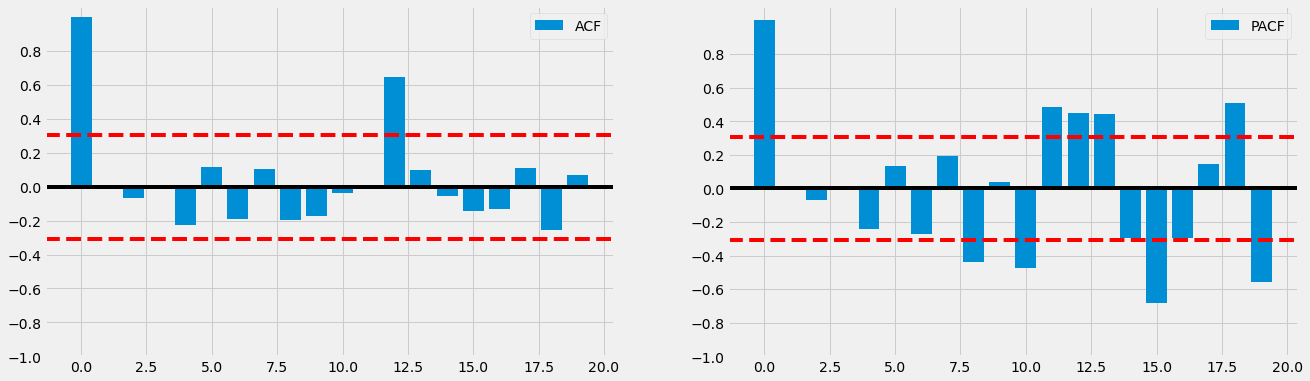

In [83]:
resid_arima = model_arima_fit.resid
print(resid_arima.describe())
acf_pacf(resid_arima)

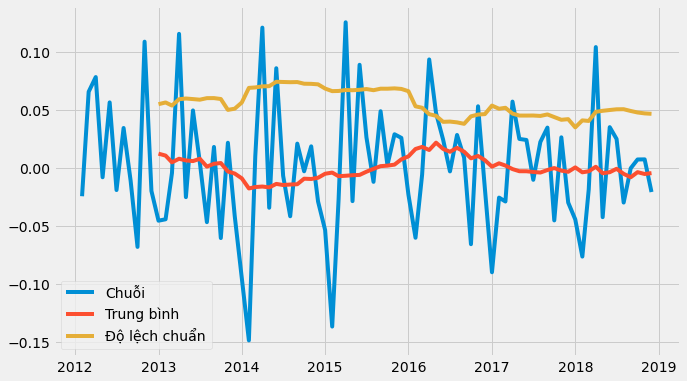

In [36]:
visualize_ts(resid_arima)

In [37]:
fc, se, conf = model_arima_fit.forecast(steps=12,alpha=0.05)
fc_arima = pd.Series(fc, index=test_log.index)
se_arima = pd.Series(se, index=test_log.index)
lower_arima = pd.Series(conf[:,0], index=test_log.index)
upper_arima = pd.Series(conf[:,1], index=test_log.index)

In [38]:
def mape_rmse(fc,test):
    fc = np.exp(fc)
    test = np.exp(test)
    mape = np.mean(abs(fc.values - test.Eg.values)/abs(test.Eg.values))
    rmse = np.mean((fc.values - test.Eg.values)**2)
    print('Mean Absolute Percent Error: %f' %mape)
    print('Root Mean Squared Error: %f' %rmse)
    
    plt.figure(figsize=(10,6))
    plt.plot(test,label='Testing data')
    plt.plot(fc,label='Forecasted data')
    plt.legend(loc='best')
    plt.show()

Mean Absolute Percent Error: 0.055577
Root Mean Squared Error: 112438371034616.250000


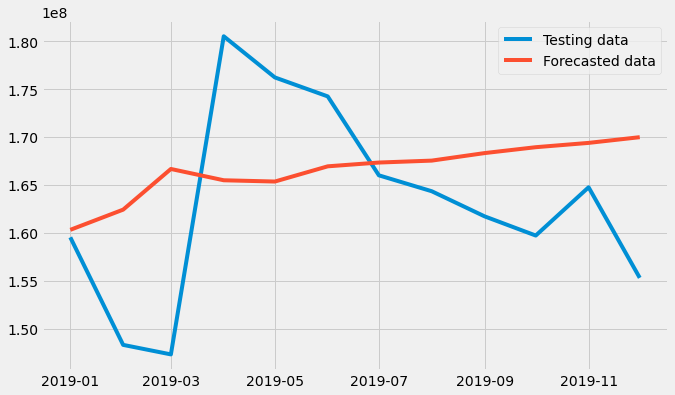

In [39]:
mape_rmse(fc_arima,test_log)

In [40]:
#Auto ARIMA
from pmdarima import auto_arima
model_auto_arima = auto_arima(train_log,start_p=0, max_p=5,
                  start_q=0, max_q=5, d=1, seasonal=False, m=12,
                  start_P=1, max_P=5, start_Q=1, max_Q=5, D=0,
                  trace=True, suppress_warnings=True, error_action='ignore', stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-202.559, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-200.593, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-200.623, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-204.300, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.392 seconds


# Mô hình SARIMA

In [41]:
# Kiểm tra chuỗi dừng theo mùa
seasonal_diff = log_diff.diff(12)
seasonal_diff.dropna(inplace=True)

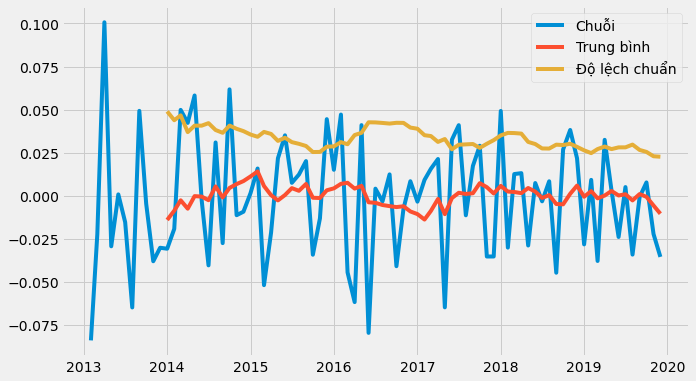

In [42]:
visualize_ts(seasonal_diff)

In [43]:
adf_ts(seasonal_diff)

ADF statistic: -10.816585
p-value: 0.000000
Critical of value: 
	1% : -3.512738
	5% : -2.897490
	10% : -2.585949


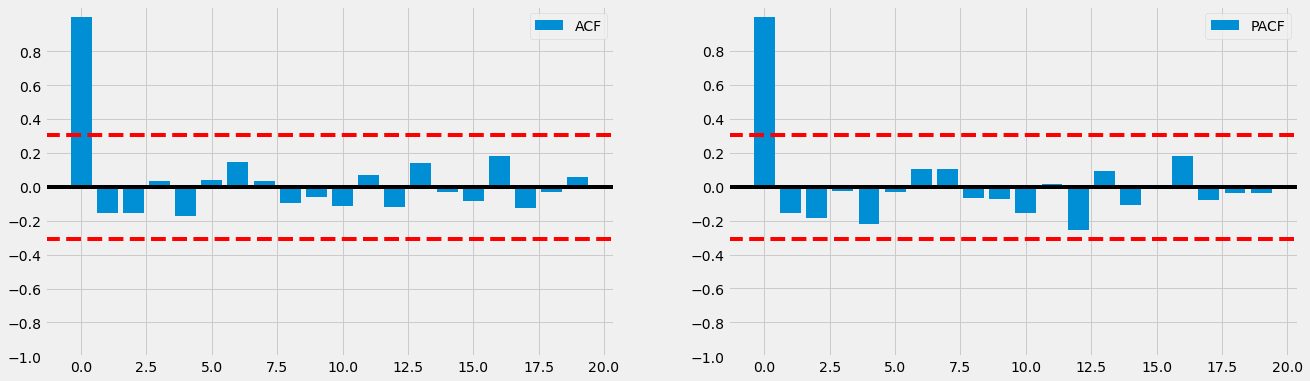

In [44]:
acf_pacf(seasonal_diff)

# 111,010,12

In [45]:
arima_order = (1,1,1)
ss_order = (0,1,0,12)
model_sarima = SARIMAX(train_log,order=arima_order, seasonal_order=ss_order)
model_sarima_fit = model_sarima.fit()
print(model_sarima_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                  Eg   No. Observations:                   84
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                 139.780
Date:                             Tue, 01 Jun 2021   AIC                           -273.559
Time:                                     21:13:18   BIC                           -266.771
Sample:                                 01-01-2012   HQIC                          -270.860
                                      - 12-01-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6908      0.133      5.209      0.000       0.431       0.951
ma.L1         -0.9930      

arima_order = (0,1,0)
ss_order = (1,1,0,12)
model_sarima = SARIMAX(train_log, order=arima_order, seasonal_order=ss_order)
model_sarima_fit = model_sarima.fit()
print(model_sarima_fit.summary())

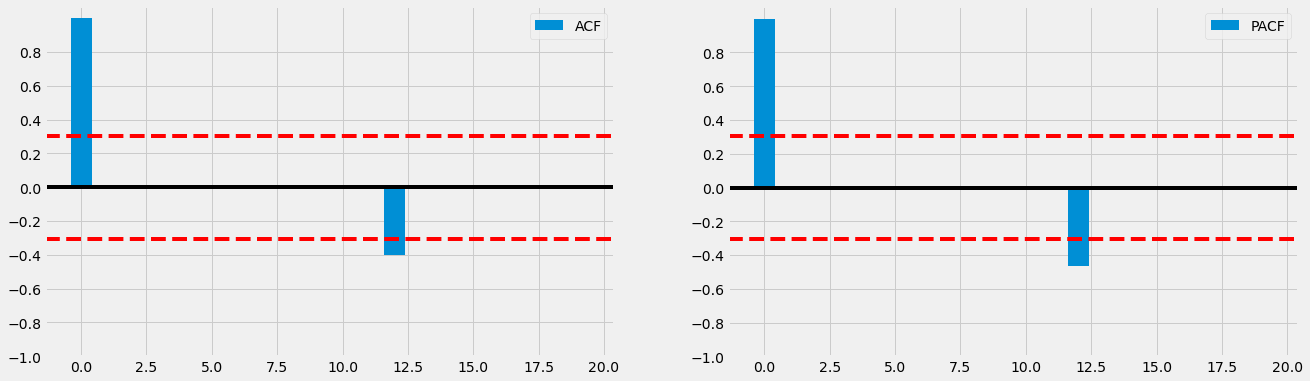

In [46]:
resid_sarima = model_sarima_fit.resid
acf_pacf(resid_sarima)

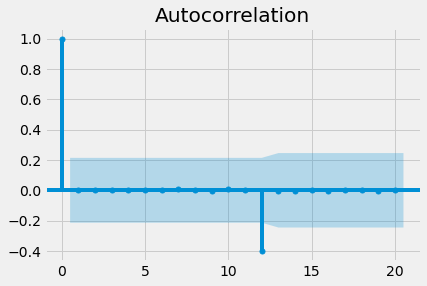

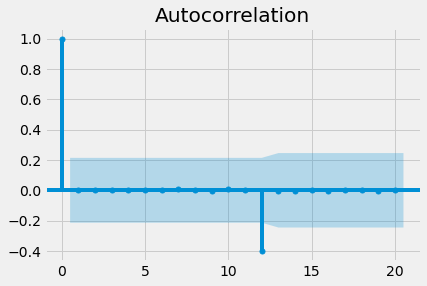

In [47]:
plot_acf(resid_sarima)

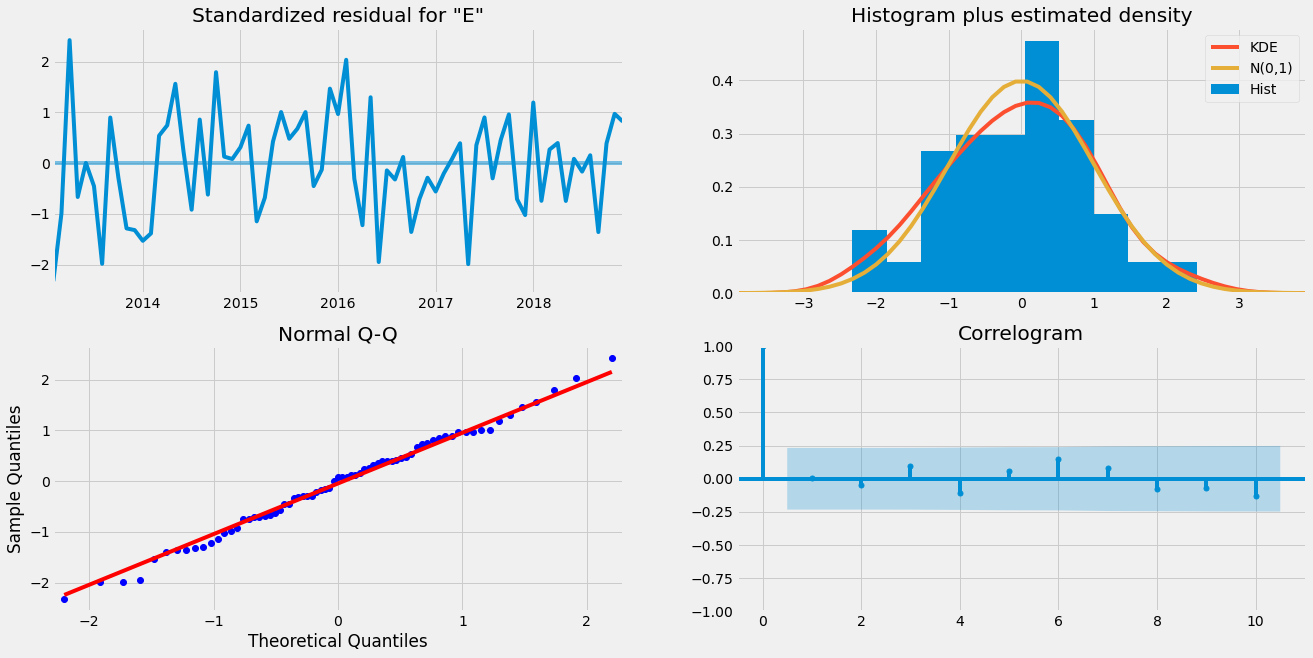

In [80]:
model_sarima_fit.plot_diagnostics(figsize=(20,10))
plt.show()

In [49]:
fc_sarima = model_sarima_fit.forecast(steps=12)

Mean Absolute Percent Error: 0.027731
Root Mean Squared Error: 34702700578022.421875


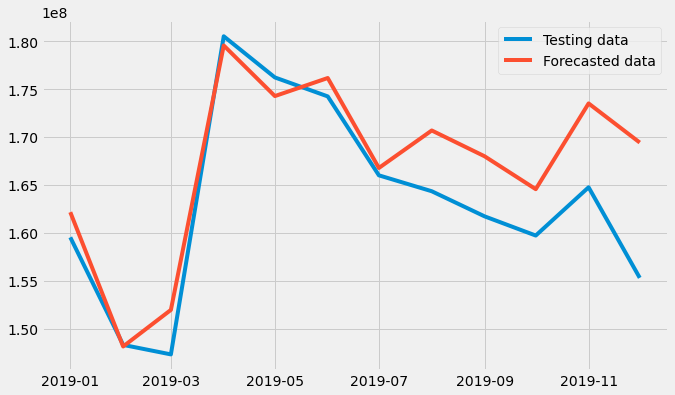

In [50]:
mape_rmse(fc_sarima,test_log)

In [51]:
#Auto SARIMA
from pmdarima import auto_arima
model_auto_sarima = auto_arima(train_log,start_p=0, max_p=5,
                  start_q=0, max_q=5, d=1, seasonal=True, m=12,
                  start_P=1, max_P=5, start_Q=1, max_Q=5, D=0,
                  trace=True, suppress_warnings=True, error_action='ignore', stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-300.897, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-202.559, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-302.420, Time=0.18 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-204.300, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-200.593, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=-300.428, Time=0.49 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-300.413, Time=0.17 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=-255.900, Time=0.17 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-298.640, Time=0.50 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=-302.741, Time=0.11 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=-300.814, Time=0.29 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=-257.216, Time=0.11 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=-302.194, Time=0.41 sec
 ARIMA(0,1,1)(1,0,0)[12]

# 012,012,12

In [52]:
arima_order1 = (0,1,2)
ss_order1 = (0,1,2,12)
model_sarima1 = SARIMAX(train_log,order=arima_order1, seasonal_order=ss_order1)
model_sarima1_fit = model_sarima1.fit()
print(model_sarima1_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                 Eg   No. Observations:                   84
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 12)   Log Likelihood                 145.742
Date:                            Tue, 01 Jun 2021   AIC                           -281.484
Time:                                    21:13:27   BIC                           -270.171
Sample:                                01-01-2012   HQIC                          -276.985
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2885      0.136     -2.115      0.034      -0.556      -0.021
ma.L2         -0.4162      0.126   

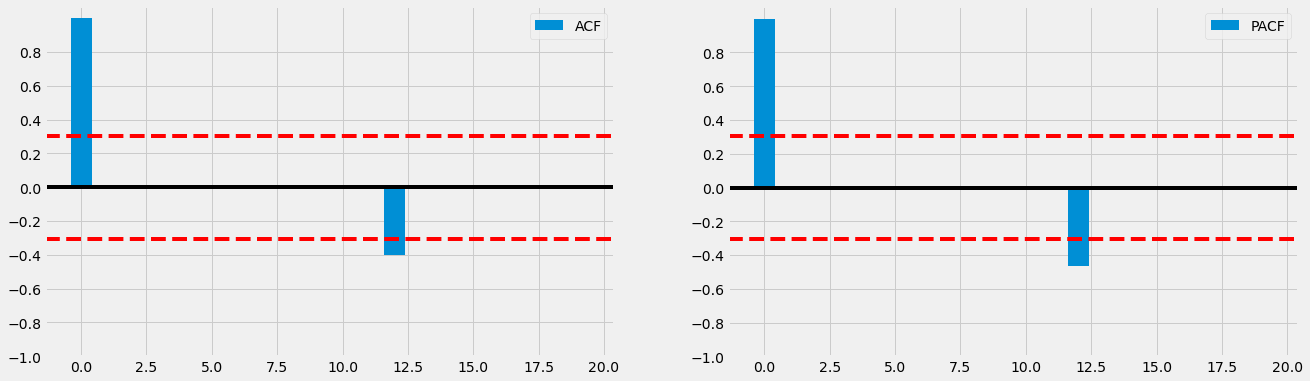

In [53]:
resid_sarima1 = model_sarima1_fit.resid
acf_pacf(resid_sarima1)

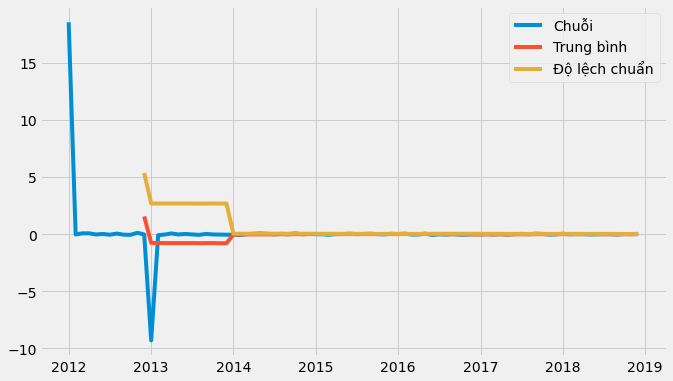

In [54]:
visualize_ts(resid_sarima1)

In [55]:
fc_sarima1 = model_sarima1_fit.forecast(steps=12)
fc_sarima1

2019-01-01    18.884954
2019-02-01    18.792771
2019-03-01    18.833804
2019-04-01    18.996128
2019-05-01    18.987389
2019-06-01    18.998159
2019-07-01    18.930752
2019-08-01    18.956264
2019-09-01    18.941546
2019-10-01    18.907622
2019-11-01    18.974379
2019-12-01    18.946911
Freq: MS, Name: predicted_mean, dtype: float64

Mean Absolute Percent Error: 0.028017
Root Mean Squared Error: 35171914383182.703125


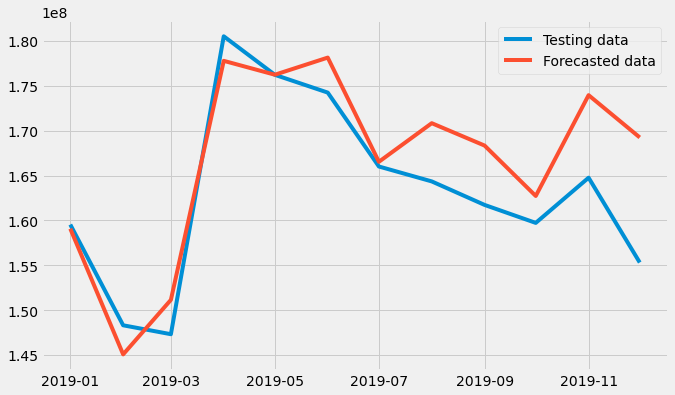

In [56]:
mape_rmse(fc_sarima1,test_log)

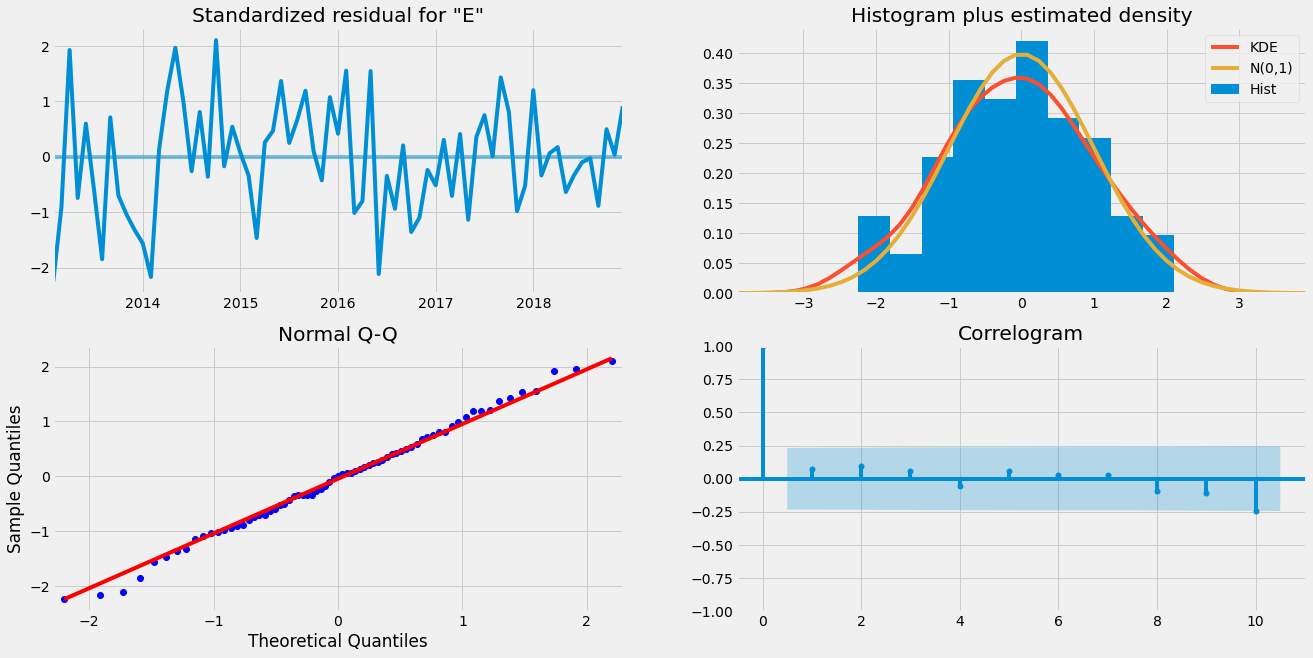

In [77]:
model_sarima1_fit.plot_diagnostics(figsize=(20,10))
plt.show()

# 111,100,12

In [57]:
arima_order2 = (1,1,1)
ss_order2 = (1,0,0,12)
model_sarima2 = SARIMAX(train_log,order=arima_order2, seasonal_order=ss_order2)
model_sarima2_fit = model_sarima2.fit()
print(model_sarima2_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                  Eg   No. Observations:                   84
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                 159.508
Date:                             Tue, 01 Jun 2021   AIC                           -311.016
Time:                                     21:13:29   BIC                           -301.341
Sample:                                 01-01-2012   HQIC                          -307.129
                                      - 12-01-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6753      0.110      6.117      0.000       0.459       0.892
ma.L1         -0.9479      

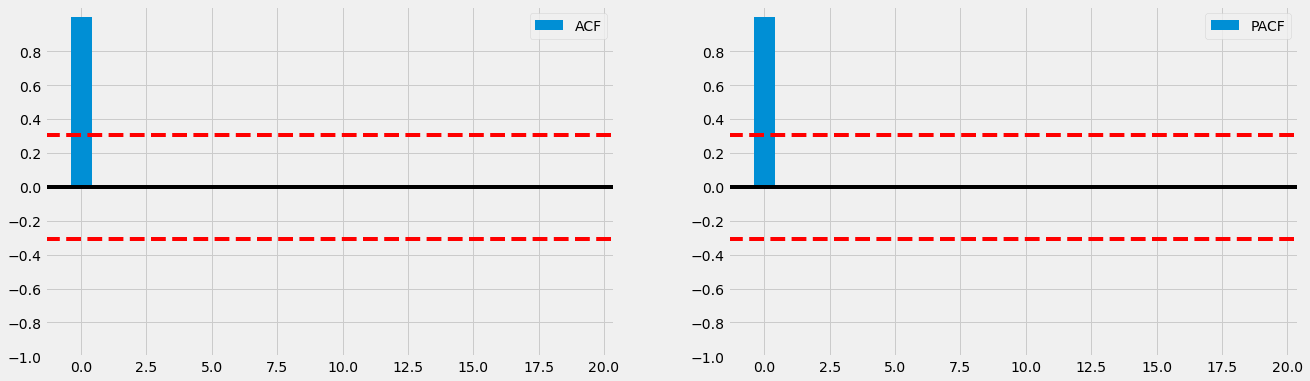

In [60]:
resid_sarima2 = model_sarima2_fit.resid
acf_pacf(resid_sarima2)

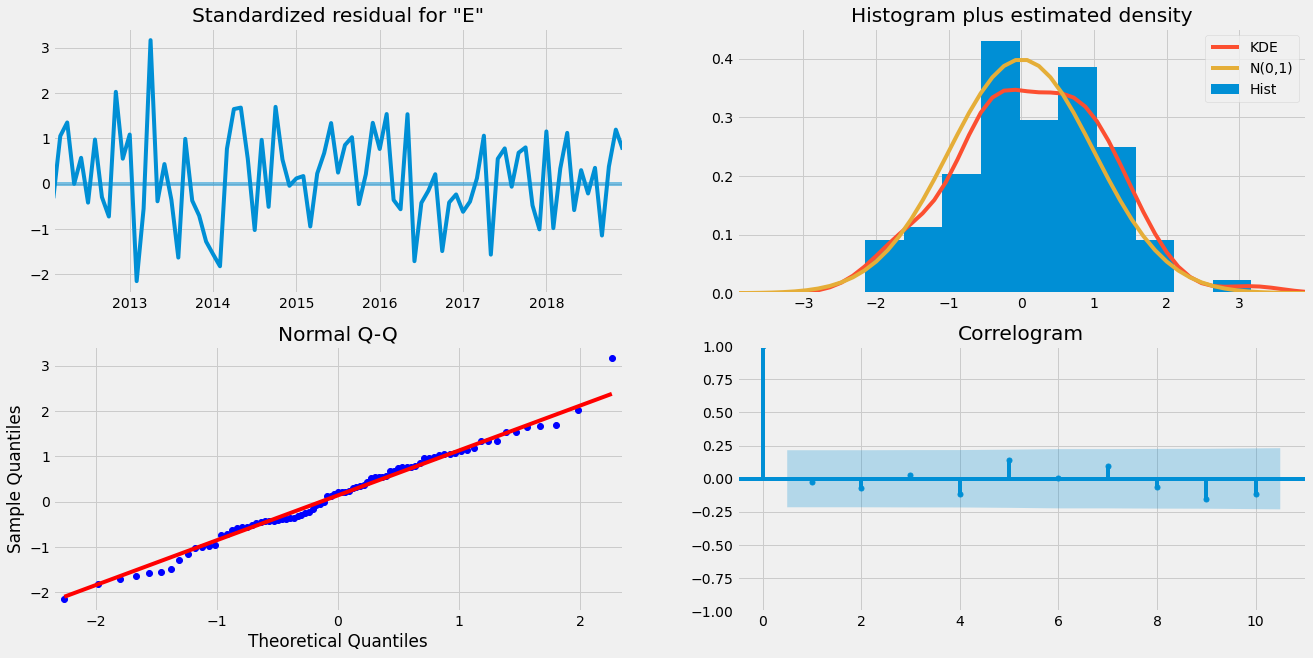

In [85]:
model_sarima2_fit.plot_diagnostics(figsize=(20,10))
plt.show()

In [62]:
fc_sarima2 = model_sarima2_fit.forecast(steps=12)

Mean Absolute Percent Error: 0.025897
Root Mean Squared Error: 25667325345006.644531


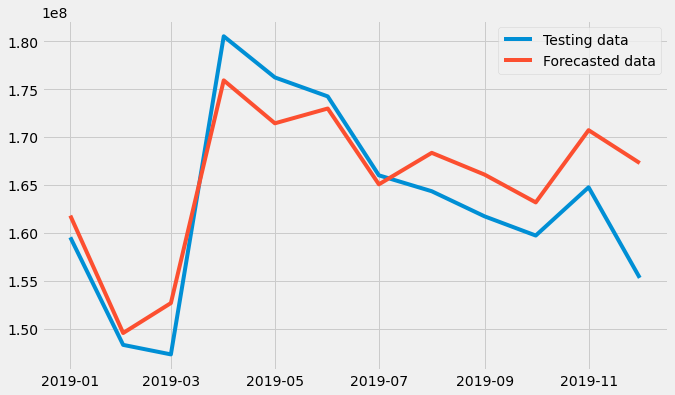

In [63]:
mape_rmse(fc_sarima2,test_log)

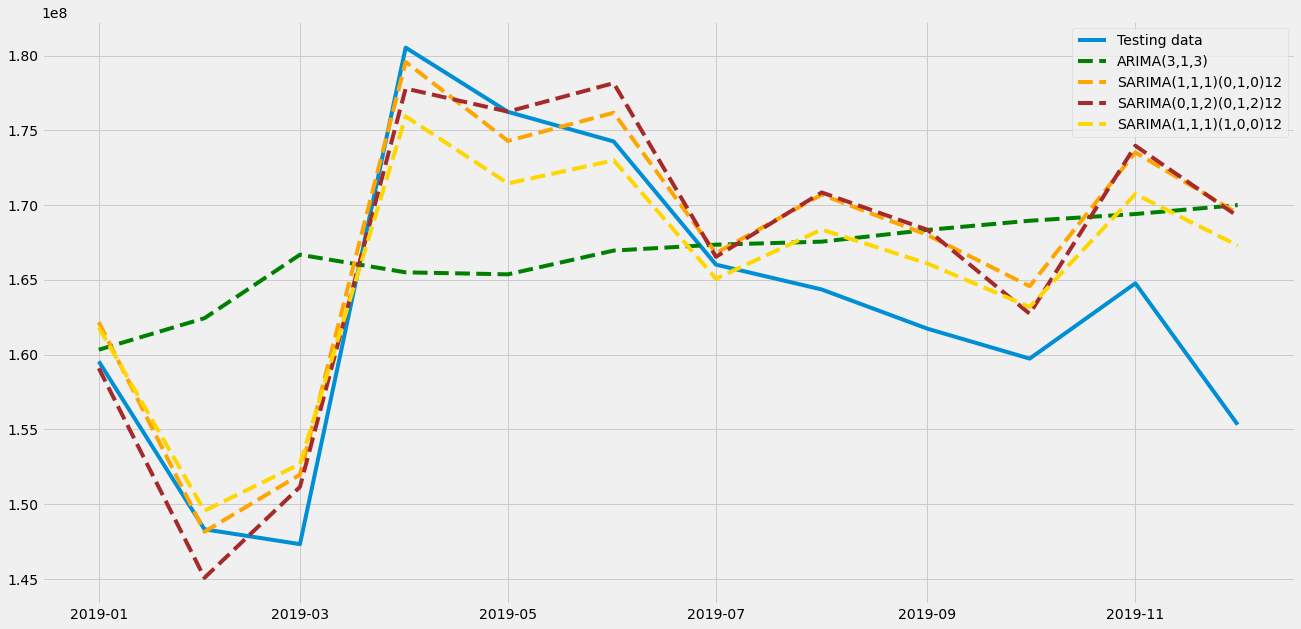

In [64]:
plt.figure(figsize=(20,10))
plt.plot(np.exp(test_log),label='Testing data')
plt.plot(np.exp(fc_arima),label='ARIMA(3,1,3)',color='green',linestyle='--')
plt.plot(np.exp(fc_sarima),label='SARIMA(1,1,1)(0,1,0)12',color='orange',linestyle='--')
plt.plot(np.exp(fc_sarima1),label='SARIMA(0,1,2)(0,1,2)12',color='brown',linestyle='--')
plt.plot(np.exp(fc_sarima2),label='SARIMA(1,1,1)(1,0,0)12',color='gold',linestyle='--')
plt.legend(loc='best')
plt.show()

In [65]:
n_forecast = 36
fc_2020_2021 = model_sarima2_fit.forecast(steps=n_forecast)

In [66]:
fc_2020_2021

2019-01-01    18.901954
2019-02-01    18.823189
2019-03-01    18.843877
2019-04-01    18.985602
2019-05-01    18.959786
2019-06-01    18.968746
2019-07-01    18.921926
2019-08-01    18.941644
2019-09-01    18.928048
2019-10-01    18.910434
2019-11-01    18.955592
2019-12-01    18.935286
2020-01-01    18.930440
2020-02-01    18.863179
2020-03-01    18.880773
2020-04-01    19.001622
2020-05-01    18.979578
2020-06-01    18.987205
2020-07-01    18.947258
2020-08-01    18.964069
2020-09-01    18.952468
2020-10-01    18.937440
2020-11-01    18.975956
2020-12-01    18.958634
2021-01-01    18.954500
2021-02-01    18.897128
2021-03-01    18.912135
2021-04-01    19.015213
2021-05-01    18.996411
2021-06-01    19.002916
2021-07-01    18.968843
2021-08-01    18.983182
2021-09-01    18.973286
2021-10-01    18.960469
2021-11-01    18.993321
2021-12-01    18.978546
Freq: MS, Name: predicted_mean, dtype: float64

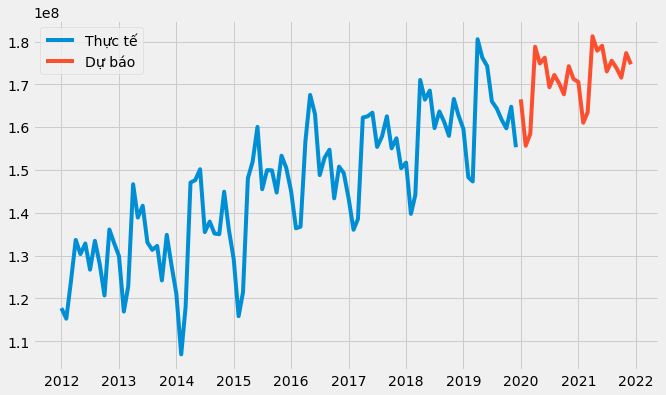

In [67]:
plt.figure(figsize=(10,6))
plt.plot(new_df,label='Thực tế')
plt.plot(np.exp(fc_2020_2021[-24:]),label='Dự báo')
plt.legend(loc='best')
plt.show()

In [68]:
np.exp(fc_2020_2021[-24:])

2020-01-01    1.664891e+08
2020-02-01    1.556591e+08
2020-03-01    1.584220e+08
2020-04-01    1.787720e+08
2020-05-01    1.748743e+08
2020-06-01    1.762132e+08
2020-07-01    1.693127e+08
2020-08-01    1.721832e+08
2020-09-01    1.701971e+08
2020-10-01    1.676586e+08
2020-11-01    1.742421e+08
2020-12-01    1.712498e+08
2021-01-01    1.705433e+08
2021-02-01    1.610344e+08
2021-03-01    1.634691e+08
2021-04-01    1.812184e+08
2021-05-01    1.778428e+08
2021-06-01    1.790035e+08
2021-07-01    1.730071e+08
2021-08-01    1.755057e+08
2021-09-01    1.737775e+08
2021-10-01    1.715643e+08
2021-11-01    1.772942e+08
2021-12-01    1.746939e+08
Freq: MS, Name: predicted_mean, dtype: float64